In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("data\State_lagged.csv")

In [5]:
df['state'].unique()

array(['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'District of Columbia', 'Delaware',
       'Florida', 'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts',
       'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri',
       'Mississippi', 'Montana', 'North Carolina', 'North Dakota',
       'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada',
       'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Virginia', 'Vermont', 'Washington', 'Wisconsin',
       'West Virginia', 'Wyoming'], dtype=object)

In [7]:
df['state_id'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
encode_cols = ["state", "state_id", "Region", "Division"]
df2 = df.copy()
# Initialize encoder
le_dict = {}
for col in encode_cols:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col])
    le_dict[col] = le   # store encoders if you need to inverse_transform later

In [6]:
df2.drop(columns=['state'], inplace=True, errors='ignore')

In [7]:
label = 'median_listing_price' 
X = df2.drop(columns=[label], axis=1)  
y = df2[label]

X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

In [8]:
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
# import lightgbm as lgb
# import xgboost as xgb
# from catboost import CatBoostRegressor
# import numpy as np
# import gc
# import warnings
# warnings.filterwarnings("ignore")

# def get_model_predictions(X, y, model_func):
#     val_preds = np.zeros(len(X))
#     cv = KFold(n_splits=10, shuffle=True, random_state=9)

#     # Lists to store fold metrics
#     rmse_list = []
#     mae_list = []
#     r2_list = []

#     for fold, (train_ind, valid_ind) in enumerate(cv.split(X, y)):
#         X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
#         X_val, y_val = X.iloc[valid_ind], y.iloc[valid_ind]

#         model = model_func()

#         # Fit based on model type
#         if model_func == lgb_model:
#             model.fit(
#                 X_train, y_train,
#                 eval_set=[(X_val, y_val)],
#                 callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(-1)]
#             )
#         elif model_func == xgb_model:
#             model.fit(
#                 X_train, y_train,
#                 eval_set=[(X_val, y_val)],
#                 verbose=0
#             )
#         elif model_func == catboost_model:
#             model.fit(
#                 X_train, y_train,
#                 eval_set=(X_val, y_val),
#                 cat_features=[0, 43, 44]
#             )
#         else:  # RF and ET
#             model.fit(X_train, y_train)

#         gc.collect()

#         y_pred_val = model.predict(X_val)
#         y_pred_val = y_pred_val.round()

#         # Evaluate
#         rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
#         mae = mean_absolute_error(y_val, y_pred_val)
#         r2 = r2_score(y_val, y_pred_val)

#         rmse_list.append(rmse)
#         mae_list.append(mae)
#         r2_list.append(r2)

#         print("-" * 60)
#         print(f"{model_func.__name__} Fold {fold}")
#         print(f"RMSE: {rmse:.4f} | MAE: {mae:.4f} | R2: {r2:.4f}")
#         print("-" * 60)
        
#         val_preds[valid_ind] = y_pred_val
#         gc.collect()

#     # Print average metrics across folds
#     print("=" * 60)
#     print(f"{model_func.__name__} CV Average Metrics:")
#     print(f"RMSE: {np.mean(rmse_list):.4f} | MAE: {np.mean(mae_list):.4f} | R2: {np.mean(r2_list):.4f}")
#     print("=" * 60)

#     return val_preds, rmse_list

In [9]:
import mlflow
from pathlib import Path

def get_project_root():
    return Path().resolve().parent.parent

# set mlflow tracking uri
mlflow.set_tracking_uri(uri=(get_project_root() / 'AI-ML-Services' / 'forecasting_engine' / 'mlruns').as_uri())

In [10]:
experiment_id = mlflow.create_experiment("RealEstate_Price_Prediction", tags={
    "topic":"experiment-management",
    "version": "v1"
})

print(f"Experiment created with ID: {experiment_id}")

Experiment created with ID: 571155472720974951


In [11]:
# We set the experiment to the one we created earlier.
experiment = mlflow.set_experiment(experiment_name="RealEstate_Price_Prediction")

In [12]:
X = X.sort_values(["year", "month"])

In [14]:
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
# import lightgbm as lgb
# import xgboost as xgb
# from catboost import CatBoostRegressor
# import numpy as np
# import gc
# import warnings
# warnings.filterwarnings("ignore")

# import mlflow
# import mlflow.sklearn
# import mlflow.lightgbm
# import mlflow.xgboost
# import mlflow.catboost
# import matplotlib.pyplot as plt
# import os


# def get_model_predictions(X, y, model_func, params=None):
#     val_preds = np.zeros(len(X))
#     cv = KFold(n_splits=10, shuffle=True, random_state=9)

#     rmse_list, mae_list, r2_list = [], [], []

#     with mlflow.start_run(run_name=model_func.__name__):
#         if params:
#             mlflow.log_params(params)   # log params if provided

#         for fold, (train_ind, valid_ind) in enumerate(cv.split(X, y)):
#             X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
#             X_val, y_val = X.iloc[valid_ind], y.iloc[valid_ind]

#             model = model_func(**params)

#             # Fit
#             if model_func == lgb_model:
#                 model.fit(
#                     X_train, y_train,
#                     eval_set=[(X_val, y_val)],
#                     callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(-1)]
#                 )
#             elif model_func == xgb_model:
#                 model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=0)
#             elif model_func == catboost_model:
#                 model.fit(X_train, y_train, eval_set=(X_val, y_val), cat_features=[2,3,4])
#             else:
#                 model.fit(X_train, y_train)

#             y_pred_val = model.predict(X_val).round()

#             rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
#             mae = mean_absolute_error(y_val, y_pred_val)
#             r2 = r2_score(y_val, y_pred_val)

#             rmse_list.append(rmse)
#             mae_list.append(mae)
#             r2_list.append(r2)

#             # Log fold metrics
#             mlflow.log_metrics({
#                 f"rmse_fold_{fold}": rmse,
#                 f"mae_fold_{fold}": mae,
#                 f"r2_fold_{fold}": r2
#             }, step=fold)

#         # Log averaged metrics
#         avg_rmse, avg_mae, avg_r2 = np.mean(rmse_list), np.mean(mae_list), np.mean(r2_list)
#         mlflow.log_metrics({
#             "avg_rmse": avg_rmse,
#             "avg_mae": avg_mae,
#             "avg_r2": avg_r2
#         })

#         # Log model
#         if model_func == lgb_model:
#             mlflow.lightgbm.log_model(model, artifact_path="model")
#         elif model_func == xgb_model:
#             mlflow.xgboost.log_model(model, artifact_path="model")
#         elif model_func == catboost_model:
#             mlflow.catboost.log_model(model, artifact_path="model")
#         else:
#             mlflow.sklearn.log_model(model, artifact_path="model")

#         # Log additional artifacts (plots, encoders, scalers)
#         plt.figure()
#         plt.plot(rmse_list, marker="o")
#         plt.title(f"{model_func.__name__} RMSE per Fold")
#         plt.xlabel("Fold")
#         plt.ylabel("RMSE")
#         plot_path = f"{model_func.__name__}_rmse_plot.png"
#         plt.savefig(plot_path)
#         mlflow.log_artifact(plot_path)
#         plt.close()
#         os.remove(plot_path)

#     return val_preds, rmse_list


In [26]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor
import numpy as np
import gc
import warnings
warnings.filterwarnings("ignore")

import mlflow
import mlflow.sklearn
import mlflow.lightgbm
import mlflow.xgboost
import mlflow.catboost
import matplotlib.pyplot as plt
import os


def get_training_folds(n_samples, n_splits=5):
    """Yield progressively larger training subsets."""
    fold_size = n_samples // n_splits
    for i in range(1, n_splits + 1):
        train_end = i * fold_size
        yield np.arange(0, train_end)


def get_model_predictions(X, y, model_func, params=None, holdout_size=51, n_splits=5):
    # Split into training base and fixed validation
    X_train_base, y_train_base = X.iloc[:-holdout_size], y.iloc[:-holdout_size]
    X_val, y_val = X.iloc[-holdout_size:], y.iloc[-holdout_size:]

    all_preds = []  # store predictions on validation set per fold
    rmse_list, mae_list, r2_list = [], [], []

    with mlflow.start_run(run_name=model_func.__name__):
        if params:
            mlflow.log_params(params)

        for fold, train_idx in enumerate(get_training_folds(len(X_train_base), n_splits)):
            X_fold_train, y_fold_train = X_train_base.iloc[train_idx], y_train_base.iloc[train_idx]

            model = model_func(**params) if params else model_func()

            # Fit with library-specific handling
            if model_func == lgb_model:
                model.fit(
                    X_fold_train, y_fold_train,
                    eval_set=[(X_val, y_val)],
                    callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(-1)]
                )
            elif model_func == xgb_model:
                model.fit(X_fold_train, y_fold_train, eval_set=[(X_val, y_val)], verbose=0)
            elif model_func == catb_model:
                model.fit(X_fold_train, y_fold_train, eval_set=(X_val, y_val), cat_features=[2,3,4])
            else:
                model.fit(X_fold_train, y_fold_train)

            # Predict on fixed validation set
            y_pred_val = model.predict(X_val).round()
            all_preds.append(y_pred_val)

            # Metrics
            rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
            mae = mean_absolute_error(y_val, y_pred_val)
            r2 = r2_score(y_val, y_pred_val)

            rmse_list.append(rmse)
            mae_list.append(mae)
            r2_list.append(r2)

            # Log fold metrics
            mlflow.log_metrics({
                f"rmse_fold_{fold+1}": rmse,
                f"mae_fold_{fold+1}": mae,
                f"r2_fold_{fold+1}": r2
            }, step=fold+1)

        # Log averaged metrics
        avg_rmse, avg_mae, avg_r2 = np.mean(rmse_list), np.mean(mae_list), np.mean(r2_list)
        mlflow.log_metrics({
            "avg_rmse": avg_rmse,
            "avg_mae": avg_mae,
            "avg_r2": avg_r2
        })

        # Log final trained model (last fold)
        if model_func == lgb_model:
            mlflow.lightgbm.log_model(model, artifact_path="model")
        elif model_func == xgb_model:
            mlflow.xgboost.log_model(model, artifact_path="model")
        elif model_func == catb_model:
            mlflow.catboost.log_model(model, artifact_path="model")
        else:
            mlflow.sklearn.log_model(model, artifact_path="model")

        # Log artifacts (plot of RMSE across folds)
        plt.figure()
        plt.plot(rmse_list, marker="o")
        plt.title(f"{model_func.__name__} RMSE per Fold")
        plt.xlabel("Fold")
        plt.ylabel("RMSE")
        plot_path = f"{model_func.__name__}_rmse_plot.png"
        plt.savefig(plot_path)
        mlflow.log_artifact(plot_path)
        plt.close()
        os.remove(plot_path)

    return all_preds, rmse_list


In [16]:
LGB_params = {
    "n_estimators": 1000,
    "learning_rate": 0.1,
    "device": "gpu"
}

XGB_params = {
    "n_estimators": 1000,
    "tree_method": "gpu_hist",
    "predictor": "gpu_predictor",
    "objective": "reg:squarederror",
    "random_state": 42
}

CAT_params = {
    "iterations": 1000,
    "loss_function": "RMSE",
    "random_seed": 42,
    "task_type": "GPU",
    "eval_metric": "RMSE",
    "verbose": 0,
    "cat_features": [2,3,4]
}

ET_params = {
    "random_state": 42,
    "n_jobs": -1,
    "verbose": 0
}


In [17]:
def lgb_model(**params):
    return lgb.LGBMRegressor(**params)

def xgb_model(**params):
    return xgb.XGBRegressor(**params)

def catb_model(**params):
    return CatBoostRegressor(**params)

def et_model(**params):
    return ExtraTreesRegressor(**params)

In [18]:
cat_cols = [
    'state_id', 'Region', 'Division'
]

for col in cat_cols:
    X[col] = X[col].astype(str)
    
# 1. Convert to category dtype
X[cat_cols] = X[cat_cols].astype('category')

# 2. Get categorical feature indices for CatBoost
cat_feature_indices = [X.columns.get_loc(col) for col in cat_cols]

print("CatBoost categorical feature indices:", cat_feature_indices)

CatBoost categorical feature indices: [2, 3, 4]


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training features
X_scaled = scaler.fit_transform(X)

# Optional: convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [20]:
rmse_results = {}

In [21]:
print("1. XGBRegressor")
xgb_val_preds, xgb_rmse_list = get_model_predictions(X_scaled, y, xgb_model, params=XGB_params)
rmse_results["XGBRegressor"] = xgb_rmse_list

1. XGBRegressor


2025/09/07 22:45:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [22]:
print("2. LGBMRegressor")
lgb_val_preds, lgb_rmse_list = get_model_predictions(X_scaled, y, lgb_model, params=LGB_params)
rmse_results["LGBMRegressor"] = lgb_rmse_list

2. LGBMRegressor
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 10689
[LightGBM] [Info] Number of data points in the train set: 958, number of used features: 49
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1650 with Max-Q Design, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 49 dense feature groups (0.05 MB) transferred to GPU in 0.002466 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 433433.953027
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l2: 4.74986e+09
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 11073
[LightGBM] [Info] Number of data points in the train set: 1916, number of used features: 49
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1650 with Max-Q Design, Vendo

2025/09/07 22:46:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [27]:
print("3. CatBoostRegressor")
cat_val_preds, cat_rmse_list = get_model_predictions(X, y, catb_model, params=CAT_params)
rmse_results["CatBoostRegressor"] = cat_rmse_list

3. CatBoostRegressor


2025/09/07 22:54:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [28]:
print("4. ExtraTreesRegressor")
et_val_preds, et_rmse_list = get_model_predictions(X_scaled, y, et_model, params=ET_params)
rmse_results["ExtraTreesRegressor"] = et_rmse_list

4. ExtraTreesRegressor


2025/09/07 22:54:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


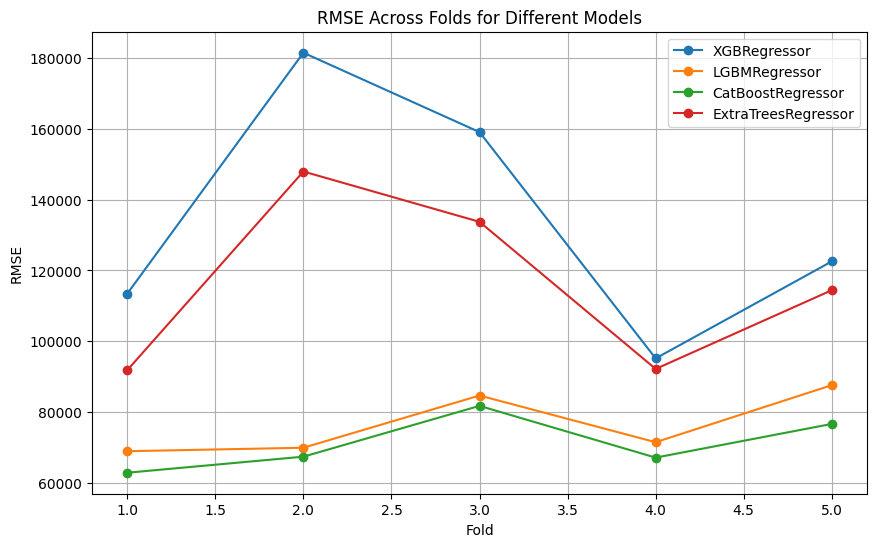

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

for model_name, rmses in rmse_results.items():
    plt.plot(range(1, len(rmses)+1), rmses, marker='o', label=model_name)

plt.xlabel("Fold")
plt.ylabel("RMSE")
plt.title("RMSE Across Folds for Different Models")
plt.legend()
plt.grid(True)
plt.show()